# Generatives Trainig mit DeepHull und Max-Distanz loss, generatives und normales Netz trainieren unabhängig voneinander
falls noch kein ICNN Netz exisitiert, kann eins gelernt werden, indem man init auf True setzt

In [20]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for


In [21]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 30
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

init = False

In [22]:
true_extremal_points = Rhombus().get_extremal_points()
if init:
    included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data= ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    random_samples = []
    for i in range(number_of_adversarial_samples): # generate random samples
        x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
        y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
        random_samples.append([[x, y]])

    value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float32)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

if init:
    torch.save(ambient_space, "../../ambient_space.pt")
    torch.save(included_space, "../../included_space.pt")
    torch.save(value, "../../value.pt")
else:
    icnn.load_state_dict(torch.load("../../icnn.pt"), strict=False)
    ambient_space = torch.load("../../ambient_space.pt")
    included_space = torch.load("../../included_space.pt")
    value = torch.load("../../value.pt")
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data=ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

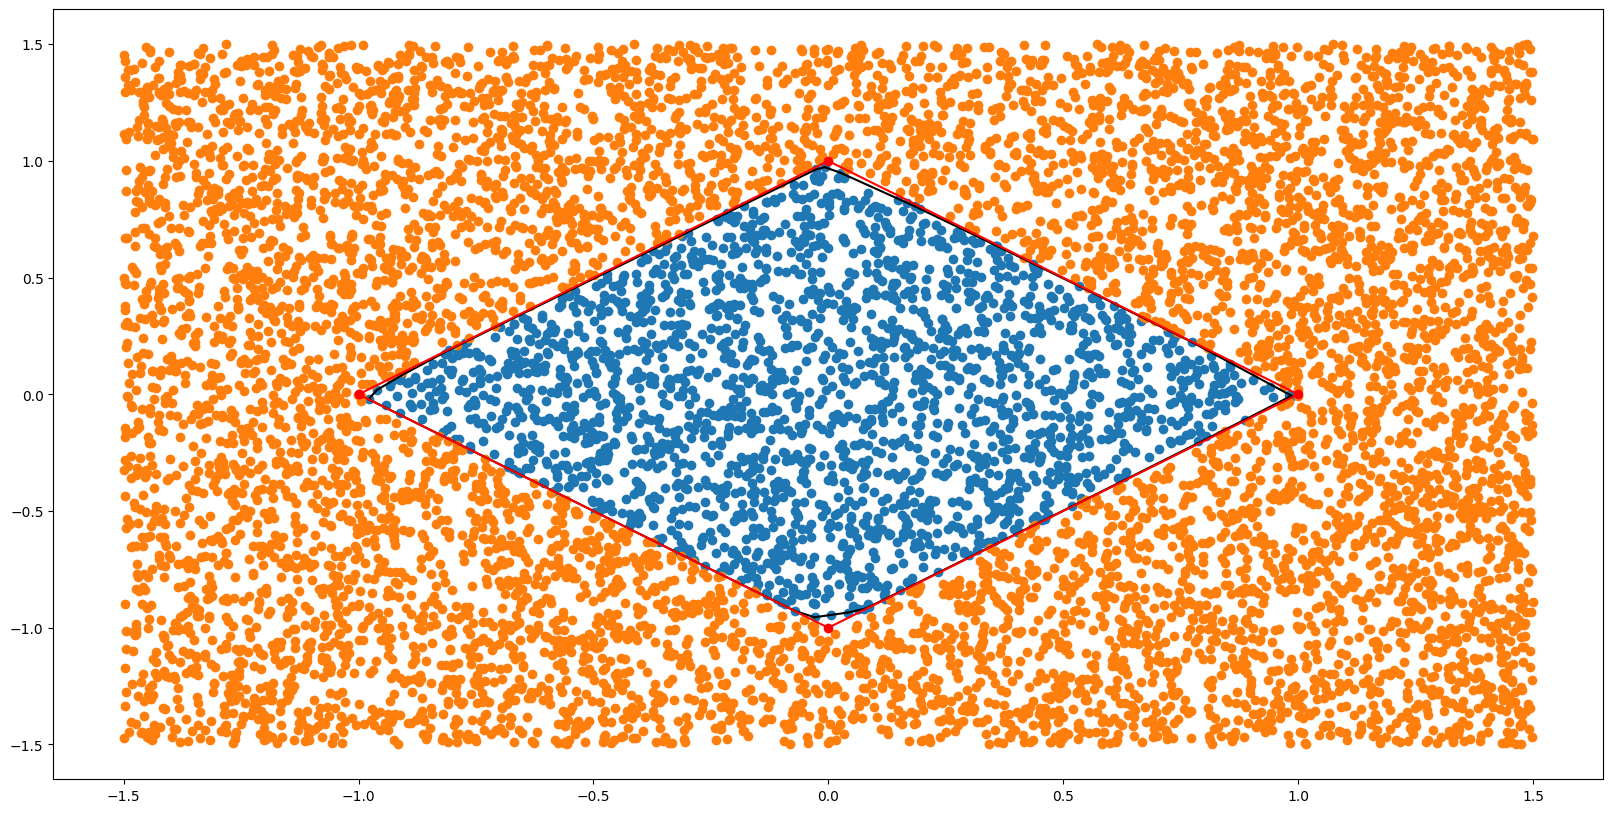

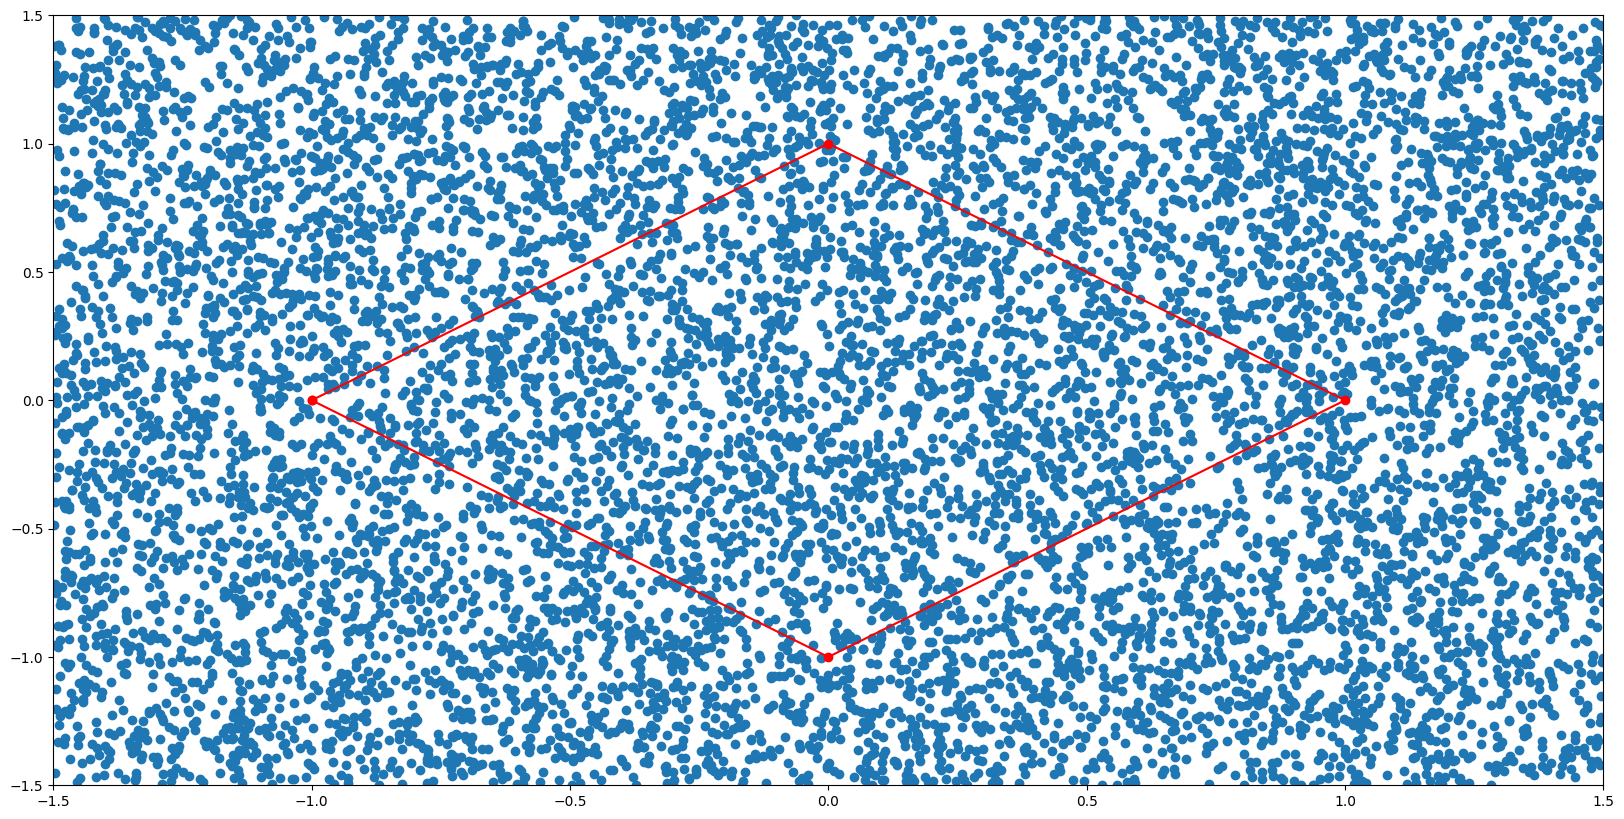

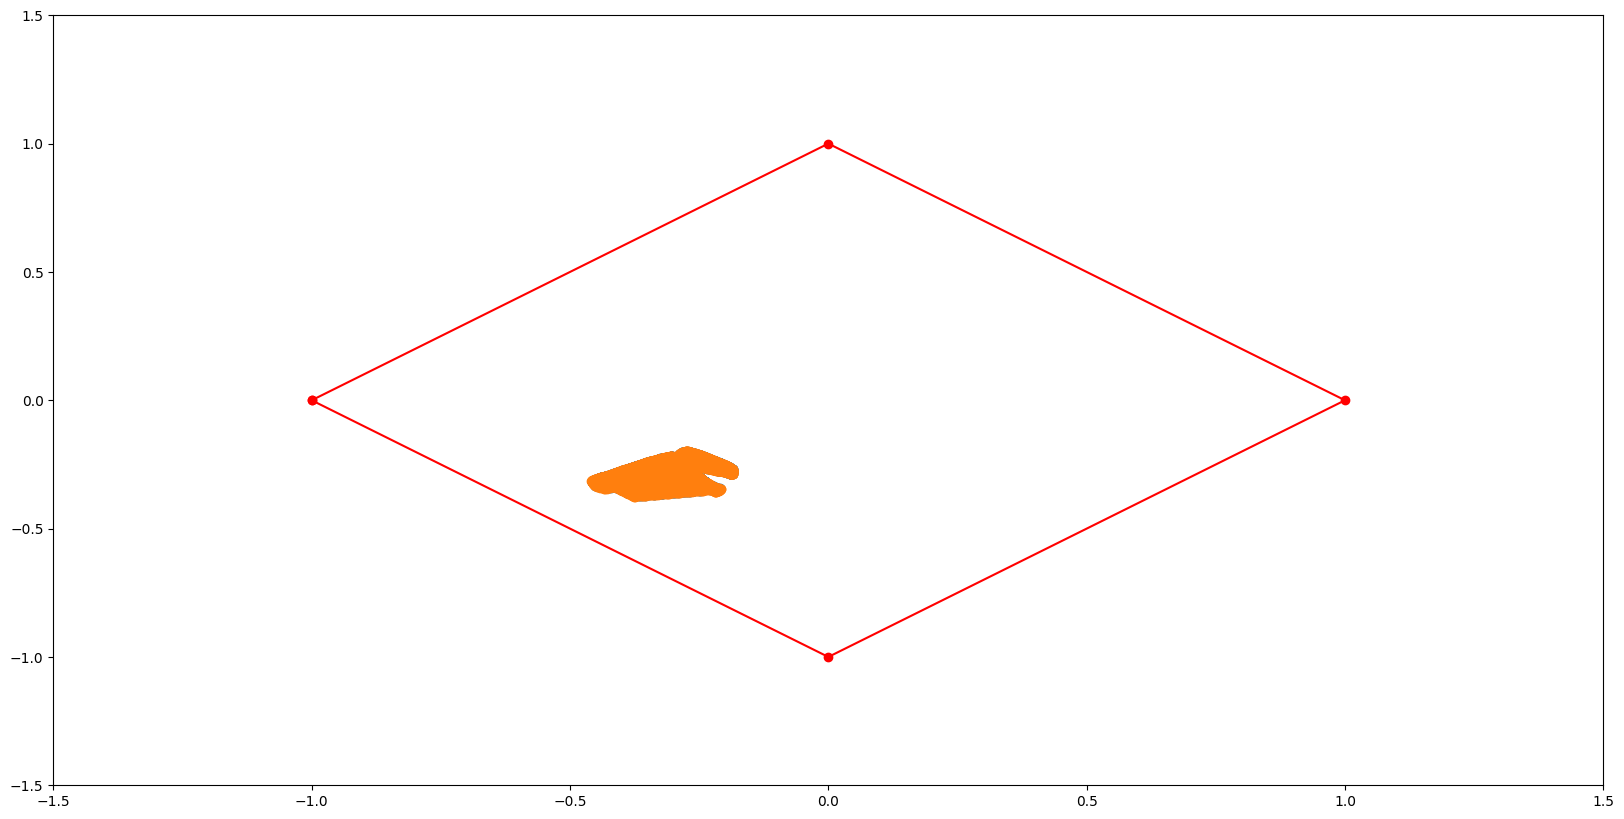

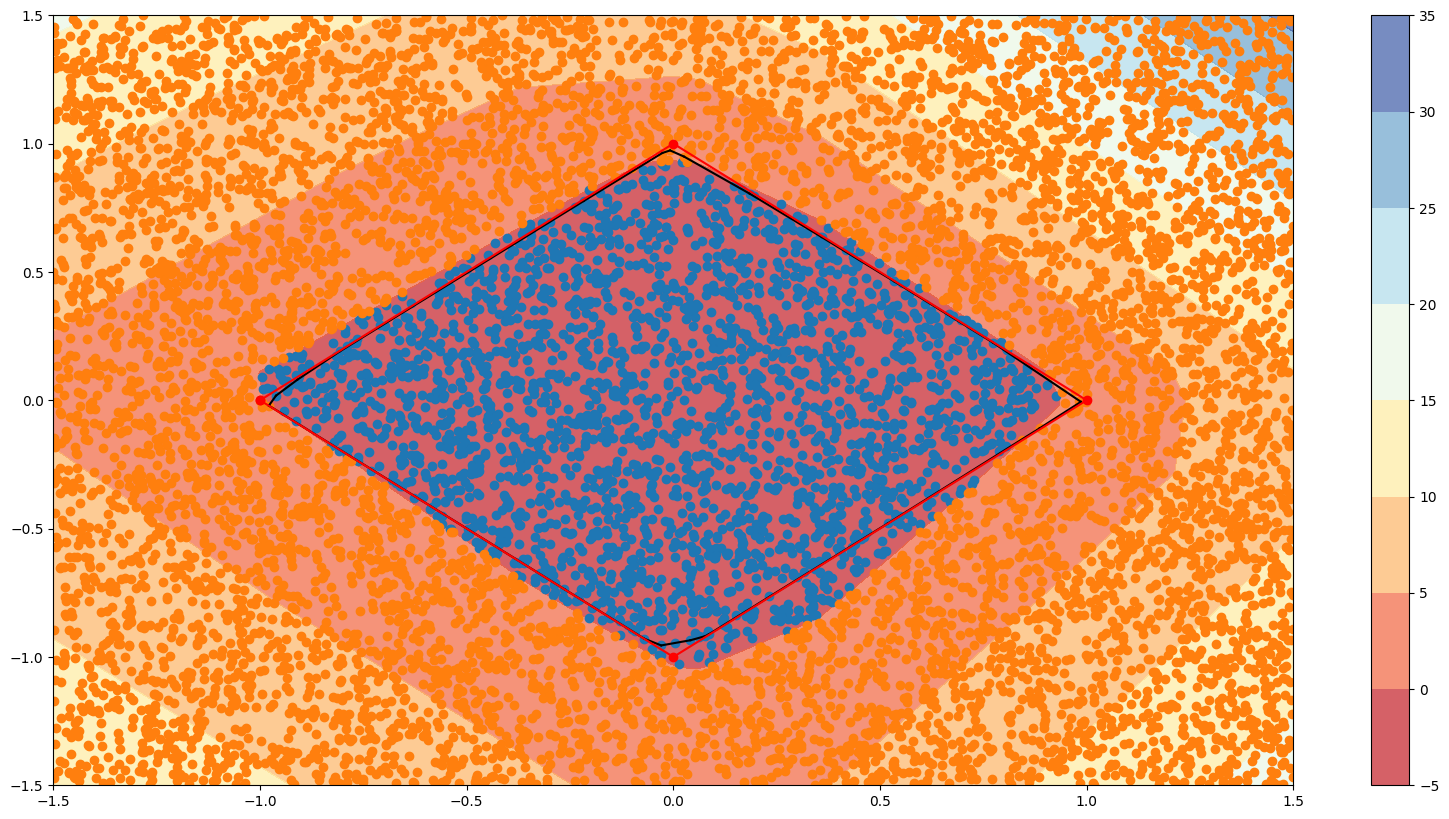

In [23]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()

if init:
    history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
    torch.save(icnn.state_dict(), "../../icnn.pt")
plots.plt_mesh()

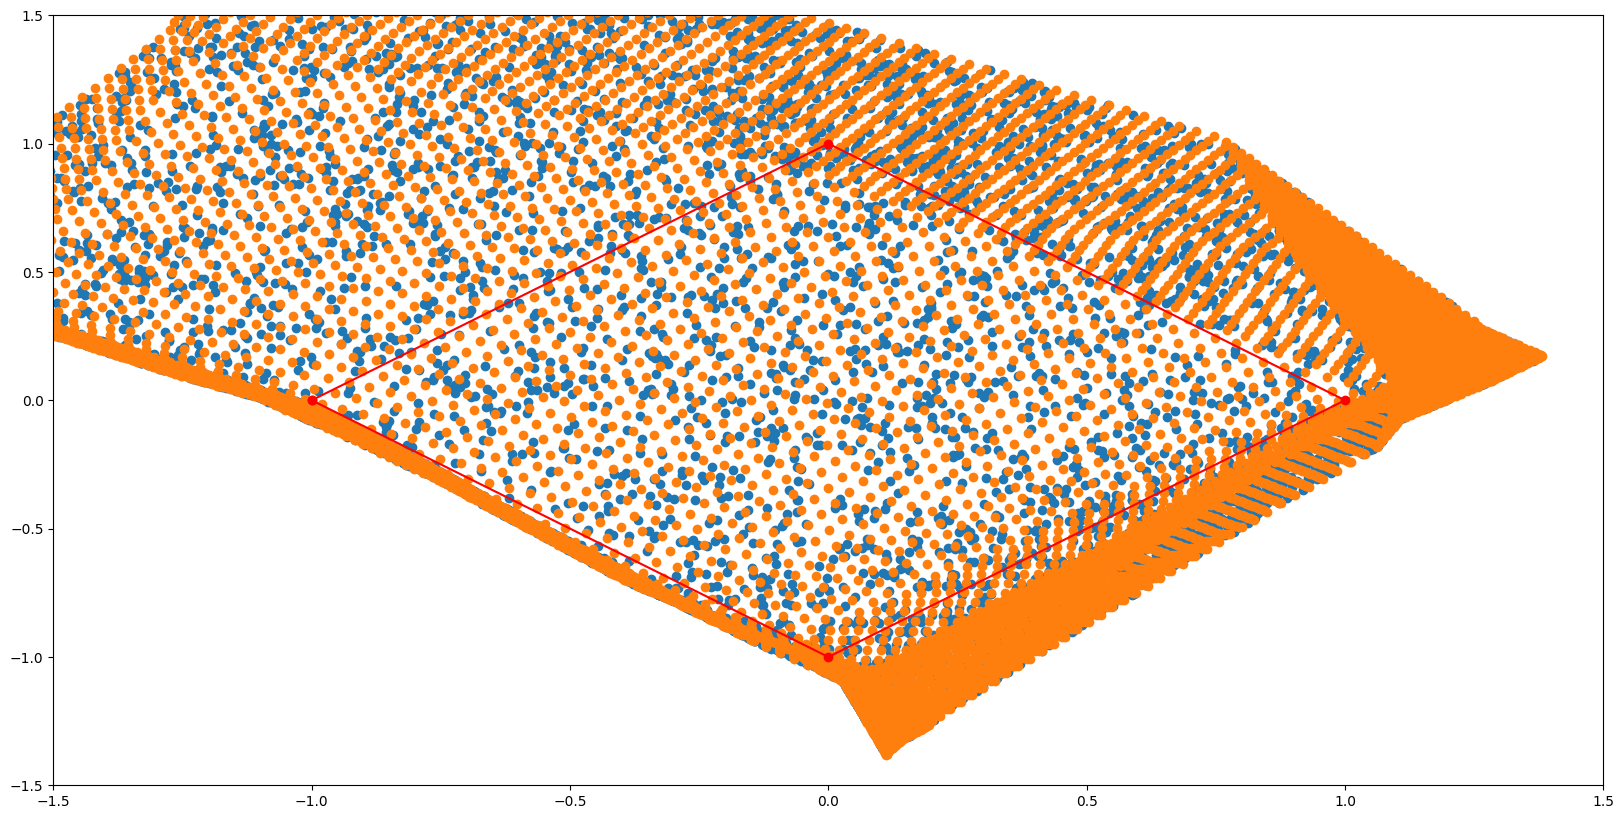

=== Epoch: 0===
batch = 0, mean loss = 3.8954315185546875, l_pos = 0.2544434666633606, l_neg = 0.0, l_gen = 3.6409881114959717
batch = 100, mean loss = 4.023854692383568, l_pos = 0.19456488926811974, l_neg = 0.0, l_gen = 3.8292897892470408
batch = 200, mean loss = 4.085020153083612, l_pos = 0.1943552366536648, l_neg = 0.0, l_gen = 3.890664916133406
batch = 221, mean loss = 4.108457386223979, l_pos = 0.19591142351810747, l_neg = 0.0, l_gen = 3.9125459620316105
=== Epoch: 1===
batch = 0, mean loss = 2.5936455726623535, l_pos = 0.1900440752506256, l_neg = 0.0, l_gen = 2.4036014080047607
batch = 100, mean loss = 4.230655625314996, l_pos = 0.19915204030452388, l_neg = 0.0, l_gen = 4.031503578223805
batch = 200, mean loss = 4.237688849814496, l_pos = 0.19580615145056995, l_neg = 0.0, l_gen = 4.041882702367222
batch = 221, mean loss = 4.222532072757704, l_pos = 0.19591142041650833, l_neg = 0.0, l_gen = 4.026620657735281
=== Epoch: 2===
batch = 0, mean loss = 3.811379909515381, l_pos = 0.22344

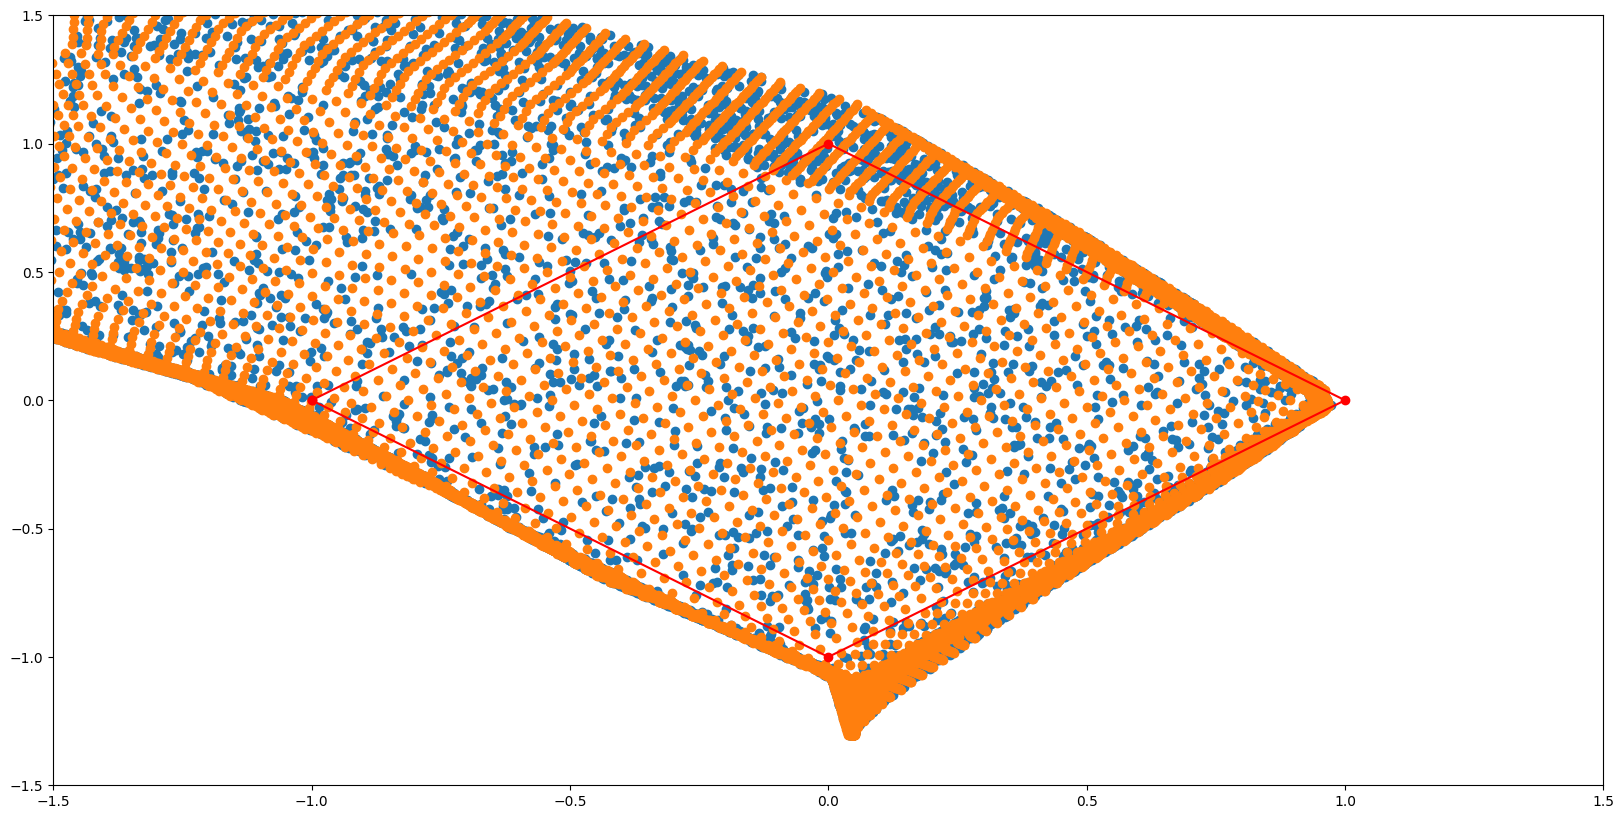

=== Epoch: 0===
batch = 0, mean loss = 8.047908782958984, l_pos = 0.23615188896656036, l_neg = 0.0, l_gen = 7.8117570877075195
batch = 100, mean loss = 7.27668567223124, l_pos = 0.19732640550868347, l_neg = 0.0, l_gen = 7.079359304786909
batch = 200, mean loss = 6.920129517417642, l_pos = 0.1955121384924324, l_neg = 0.0, l_gen = 6.724617381594074
batch = 221, mean loss = 6.849507731010472, l_pos = 0.19591142055136046, l_neg = 0.0, l_gen = 6.6535963170668655
=== Epoch: 1===
batch = 0, mean loss = 6.295995712280273, l_pos = 0.20508912205696106, l_neg = 0.0, l_gen = 6.090906620025635
batch = 100, mean loss = 5.557953180653034, l_pos = 0.19210513363970388, l_neg = 0.0, l_gen = 5.365848021932168
batch = 200, mean loss = 5.2603880125491775, l_pos = 0.19606963089152948, l_neg = 0.0, l_gen = 5.064318376987135
batch = 221, mean loss = 5.227277645697961, l_pos = 0.19591142243929038, l_neg = 0.0, l_gen = 5.031366213414464
=== Epoch: 2===
batch = 0, mean loss = 5.301634788513184, l_pos = 0.1875472

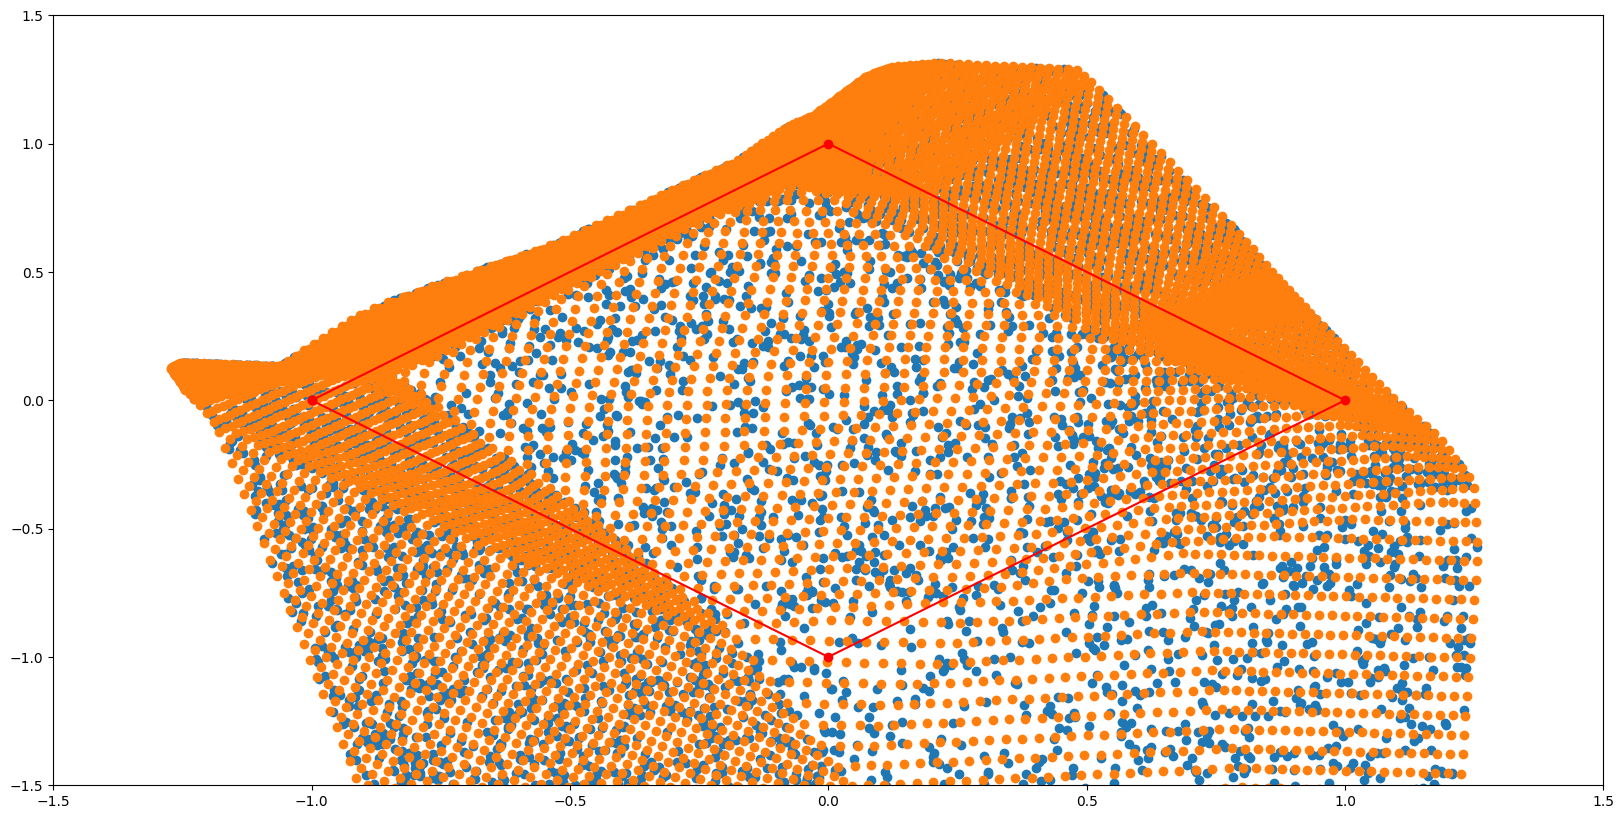

=== Epoch: 0===
batch = 0, mean loss = 4.367981910705566, l_pos = 0.2488454282283783, l_neg = 0.0, l_gen = 4.119136333465576
batch = 100, mean loss = 4.116798070397707, l_pos = 0.19509104543393202, l_neg = 0.0, l_gen = 3.921707040012473
batch = 200, mean loss = 4.276454432093682, l_pos = 0.19473001546231075, l_neg = 0.0, l_gen = 4.081724427825776
batch = 221, mean loss = 4.232014233170592, l_pos = 0.19591142189988184, l_neg = 0.0, l_gen = 4.0361028203058025
=== Epoch: 1===
batch = 0, mean loss = 4.638973712921143, l_pos = 0.17513972520828247, l_neg = 0.0, l_gen = 4.463833808898926
batch = 100, mean loss = 4.28321093970006, l_pos = 0.19707916927809763, l_neg = 0.0, l_gen = 4.086131782815007
batch = 200, mean loss = 4.243303477467589, l_pos = 0.19660888412105504, l_neg = 0.0, l_gen = 4.046694595422318
batch = 221, mean loss = 4.24384767707117, l_pos = 0.19591142163017755, l_neg = 0.0, l_gen = 4.0479362593517045
=== Epoch: 2===
batch = 0, mean loss = 5.303709030151367, l_pos = 0.196423381

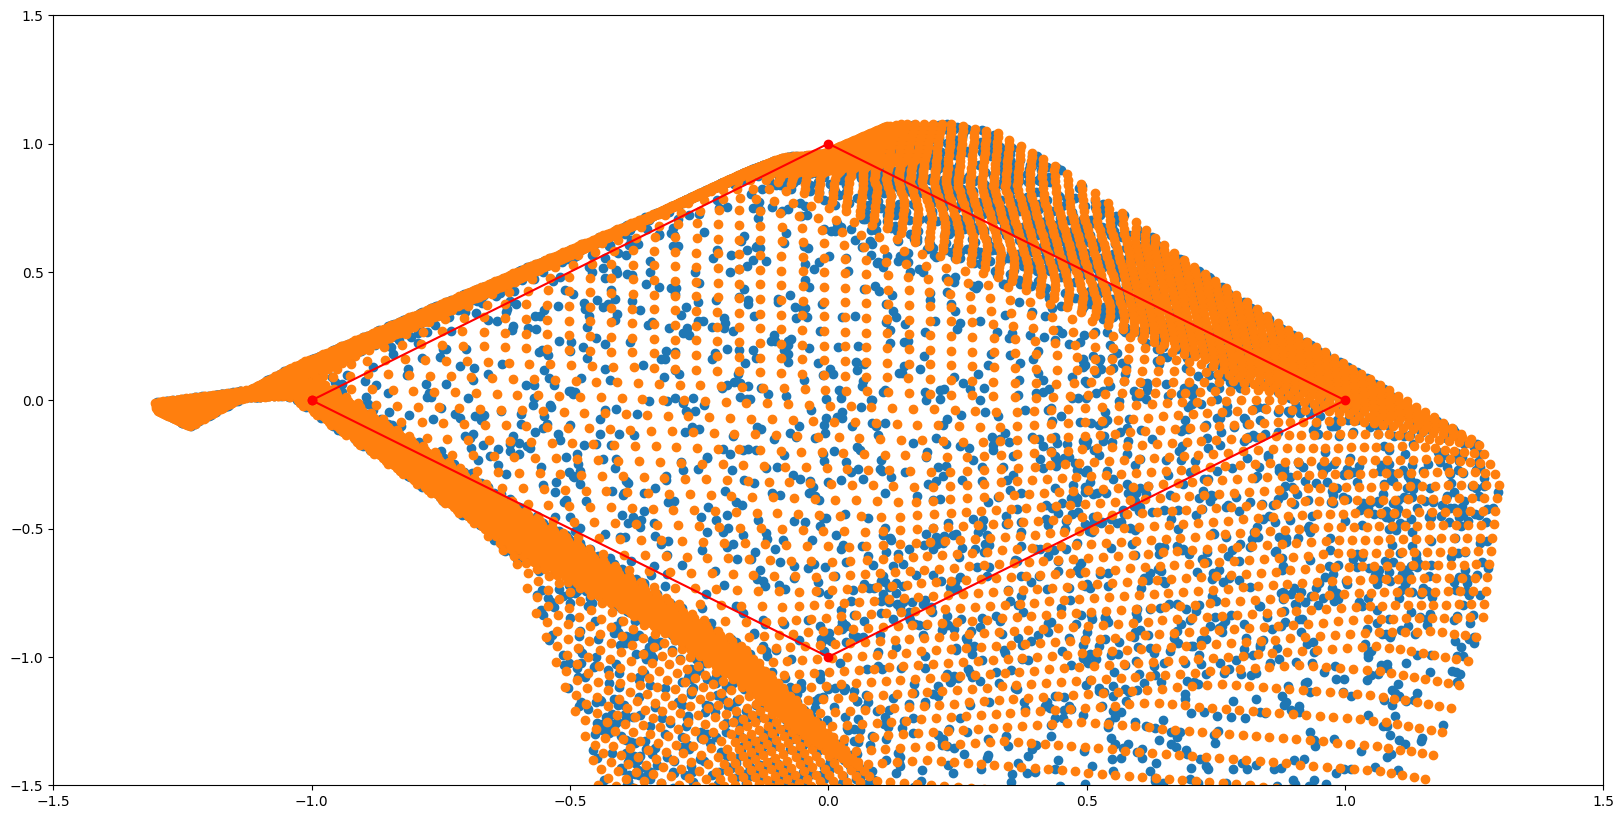

=== Epoch: 0===
batch = 0, mean loss = 4.053328990936279, l_pos = 0.18138335645198822, l_neg = 0.0, l_gen = 3.87194561958313
batch = 100, mean loss = 4.131716287962281, l_pos = 0.19493271838320364, l_neg = 0.0, l_gen = 3.93678356987415
batch = 200, mean loss = 4.113720907500727, l_pos = 0.19502176537146024, l_neg = 0.0, l_gen = 3.9186991405724294
batch = 221, mean loss = 4.1237994605060075, l_pos = 0.1959114204839344, l_neg = 0.0, l_gen = 3.9278880341560054
=== Epoch: 1===
batch = 0, mean loss = 4.6288533210754395, l_pos = 0.2093527615070343, l_neg = 0.0, l_gen = 4.419500350952148
batch = 100, mean loss = 3.9121442926992285, l_pos = 0.1968090070946382, l_neg = 0.0, l_gen = 3.715335274686908
batch = 200, mean loss = 3.956858895311308, l_pos = 0.19531687641914805, l_neg = 0.0, l_gen = 3.761542016593971
batch = 221, mean loss = 3.997872856947092, l_pos = 0.19591142203473397, l_neg = 0.0, l_gen = 3.8019614305970895
=== Epoch: 2===
batch = 0, mean loss = 4.144782543182373, l_pos = 0.1794295

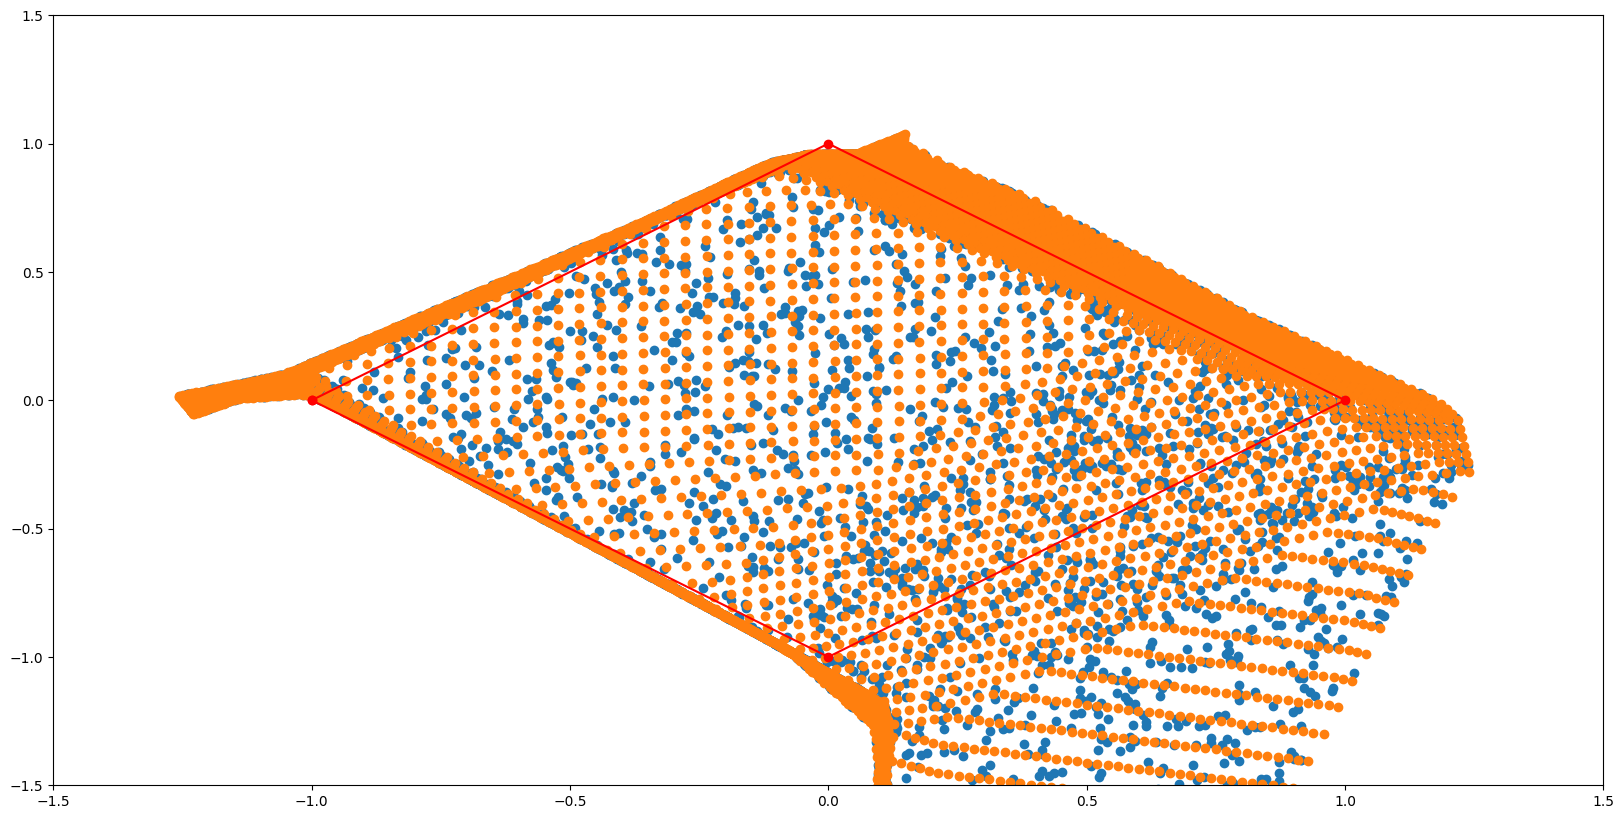

In [24]:
for i in range(int(epochs / 10)):
    history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=10, train_ICNN=False, hyper_lambda=hyper_lambda, use_max_distance=True)
    print("run {}".format(i))
    plots.plt_adversarial_dotted()